In [789]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [790]:
#Reading the Train Dataset
train=pd.read_csv(r"C:\Users\anjup\Downloads\train_ctrUa4K.csv")
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [791]:
test=pd.read_csv(r"C:\Users\anjup\Downloads\test_lAUu6dG.csv")
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [792]:
train_original=train.copy()
test_original=test.copy()

In [793]:
#Checking for null values
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [794]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [795]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [796]:
#Replace the value in dependants
train['Dependents'] = train['Dependents'].replace('3+', 3)
test['Dependents'] = test['Dependents'].replace('3+', 3)

# Convert 'Dependents' column to numeric
train['Dependents'] = pd.to_numeric(train['Dependents'])
test['Dependents'] = pd.to_numeric(test['Dependents'])

In [797]:
#Checking after replacing
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    float64
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


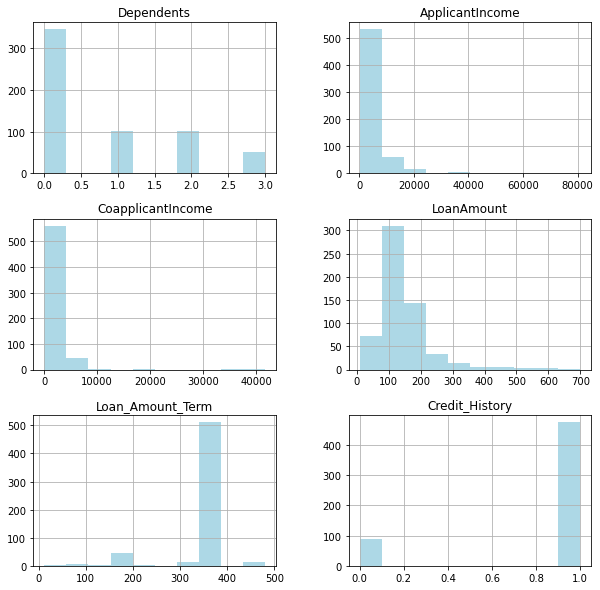

In [798]:
#Checking the distribution
train.hist(figsize=(10,10), color= 'lightblue')
plt.show()

In [799]:
#Handling  missing values using median and mode
for i in ['LoanAmount','Loan_Amount_Term','Credit_History','Dependents']:
    train[i]=train[i].fillna(train[i].median())
for i in ['LoanAmount','Loan_Amount_Term','Credit_History','Dependents']:
    test[i]=test[i].fillna(test[i].median())
    
    
for i in ['Gender','Married','Self_Employed']:
    train[i]=train[i].fillna(train[i].mode()[0])
for i in ['Gender','Married','Self_Employed']:
    test[i]=test[i].fillna(test[i].mode()[0])

In [800]:
#checking after handling the missing values
train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [801]:
test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [802]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [803]:
#Handling the outliers for LoanAmount for train dataset
Q1=np.percentile(train['LoanAmount'],25)
Q2=np.percentile(train['LoanAmount'],50)
Q3=np.percentile(train['LoanAmount'],75)
IQR=Q3-Q1
Low_limit=Q1-1.5*IQR
Upp_limit=Q3+1.5*IQR

print("The first quartile :",Q1,"\nThe Second Quartile :",Q2,"\nThe third Quartile :", Q3,"\nIQR :",IQR,"\nUpper limit : ",Upp_limit,"\nLower Limit :",Low_limit)

outlier=[]
for i in train['LoanAmount']:
    if(i>Upp_limit) or (i<Low_limit):
        outlier.append(i)
        
print(f"The outliers are : {outlier}")
train['LoanAmount']=np.where(train['LoanAmount']>Upp_limit,Upp_limit,np.where(train['LoanAmount']<Low_limit,Low_limit,train['LoanAmount']))


The first quartile : 100.25 
The Second Quartile : 128.0 
The third Quartile : 164.75 
IQR : 64.5 
Upper limit :  261.5 
Lower Limit : 3.5
The outliers are : [267.0, 349.0, 315.0, 320.0, 286.0, 312.0, 265.0, 370.0, 650.0, 290.0, 600.0, 275.0, 700.0, 495.0, 280.0, 279.0, 304.0, 330.0, 436.0, 480.0, 300.0, 376.0, 490.0, 308.0, 570.0, 380.0, 296.0, 275.0, 360.0, 405.0, 500.0, 480.0, 311.0, 480.0, 400.0, 324.0, 600.0, 275.0, 292.0, 350.0, 496.0]


In [804]:
#Handling the outliers for LoanAmount for test dataset
Q1=np.percentile(test['LoanAmount'],25)
Q2=np.percentile(test['LoanAmount'],50)
Q3=np.percentile(test['LoanAmount'],75)
IQR=Q3-Q1
Low_limit=Q1-1.5*IQR
Upp_limit=Q3+1.5*IQR

print("The first quartile :",Q1,"\nThe Second Quartile :",Q2,"\nThe third Quartile :", Q3,"\nIQR :",IQR,"\nUpper limit : ",Upp_limit,"\nLower Limit :",Low_limit)

outlier=[]
for i in test['LoanAmount']:
    if(i>Upp_limit) or (i<Low_limit):
        outlier.append(i)
        
print(f"The outliers are : {outlier}")
test['LoanAmount']=np.where(test['LoanAmount']>Upp_limit,Upp_limit,np.where(test['LoanAmount']<Low_limit,Low_limit,test['LoanAmount']))


The first quartile : 101.0 
The Second Quartile : 125.0 
The third Quartile : 157.5 
IQR : 56.5 
Upper limit :  242.25 
Lower Limit : 16.25
The outliers are : [280.0, 300.0, 290.0, 275.0, 360.0, 257.0, 390.0, 256.0, 300.0, 550.0, 260.0, 336.0, 412.0, 460.0, 297.0, 300.0, 260.0, 254.0]


In [805]:
#Handling the outliers for Dependents for train dataset
Q1=np.percentile(train['Dependents'],25)
Q2=np.percentile(train['Dependents'],50)
Q3=np.percentile(train['Dependents'],75)
IQR=Q3-Q1
Low_limit=Q1-1.5*IQR
Upp_limit=Q3+1.5*IQR

print("The first quartile :",Q1,"\nThe Second Quartile :",Q2,"\nThe third Quartile :", Q3,"\nIQR :",IQR,"\nUpper limit : ",Upp_limit,"\nLower Limit :",Low_limit)

outlier=[]
for i in train['Dependents']:
    if(i>Upp_limit) or (i<Low_limit):
        outlier.append(i)
        
print(f"The outliers are : {outlier}")
train['Dependents']=np.where(train['Dependents']>Upp_limit,Upp_limit,np.where(train['Dependents']<Low_limit,Low_limit,train['Dependents']))



The first quartile : 0.0 
The Second Quartile : 0.0 
The third Quartile : 1.0 
IQR : 1.0 
Upper limit :  2.5 
Lower Limit : -1.5
The outliers are : [3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]


In [806]:
#Handling the outliers for Dependents for test dataset
Q1=np.percentile(test['Dependents'],25)
Q2=np.percentile(test['Dependents'],50)
Q3=np.percentile(test['Dependents'],75)
IQR=Q3-Q1
Low_limit=Q1-1.5*IQR
Upp_limit=Q3+1.5*IQR

print("The first quartile :",Q1,"\nThe Second Quartile :",Q2,"\nThe third Quartile :", Q3,"\nIQR :",IQR,"\nUpper limit : ",Upp_limit,"\nLower Limit :",Low_limit)

outlier=[]
for i in test['Dependents']:
    if(i>Upp_limit) or (i<Low_limit):
        outlier.append(i)
        
print(f"The outliers are : {outlier}")
test['Dependents']=np.where(test['Dependents']>Upp_limit,Upp_limit,np.where(test['Dependents']<Low_limit,Low_limit,test['Dependents']))

The first quartile : 0.0 
The Second Quartile : 0.0 
The third Quartile : 2.0 
IQR : 2.0 
Upper limit :  5.0 
Lower Limit : -3.0
The outliers are : []


In [807]:
#Handling the outliers for LoanAmountTerm for train dataset
Q1=np.percentile(train['Loan_Amount_Term'],25)
Q2=np.percentile(train['Loan_Amount_Term'],50)
Q3=np.percentile(train['Loan_Amount_Term'],75)
IQR=Q3-Q1
Low_limit=Q1-1.5*IQR
Upp_limit=Q3+1.5*IQR

print("The first quartile :",Q1,"\nThe Second Quartile :",Q2,"\nThe third Quartile :", Q3,"\nIQR :",IQR,"\nUpper limit : ",Upp_limit,"\nLower Limit :",Low_limit)

outlier=[]
for i in train['Loan_Amount_Term']:
    if(i>Upp_limit) or (i<Low_limit):
        outlier.append(i)
        
print(f"The outliers are : {outlier}")
train['Loan_Amount_Term']=np.where(train['Loan_Amount_Term']>Upp_limit,Upp_limit,np.where(train['Loan_Amount_Term']<Low_limit,Low_limit,train['Loan_Amount_Term']))


The first quartile : 360.0 
The Second Quartile : 360.0 
The third Quartile : 360.0 
IQR : 0.0 
Upper limit :  360.0 
Lower Limit : 360.0
The outliers are : [120.0, 240.0, 180.0, 180.0, 60.0, 300.0, 480.0, 300.0, 240.0, 180.0, 120.0, 180.0, 180.0, 480.0, 180.0, 180.0, 480.0, 120.0, 180.0, 180.0, 180.0, 180.0, 480.0, 300.0, 180.0, 480.0, 180.0, 300.0, 180.0, 180.0, 480.0, 180.0, 180.0, 60.0, 180.0, 180.0, 480.0, 180.0, 36.0, 180.0, 300.0, 480.0, 480.0, 84.0, 180.0, 180.0, 180.0, 180.0, 480.0, 300.0, 480.0, 300.0, 180.0, 180.0, 480.0, 180.0, 180.0, 180.0, 300.0, 300.0, 180.0, 240.0, 300.0, 300.0, 180.0, 180.0, 180.0, 180.0, 300.0, 84.0, 12.0, 480.0, 300.0, 180.0, 480.0, 180.0, 180.0, 36.0, 180.0, 480.0, 84.0, 84.0, 180.0, 240.0, 180.0, 180.0, 180.0, 180.0]


In [808]:
#Handling the outliers for LoanAmountTerm for test dataset
Q1=np.percentile(test['Loan_Amount_Term'],25)
Q2=np.percentile(test['Loan_Amount_Term'],50)
Q3=np.percentile(test['Loan_Amount_Term'],75)
IQR=Q3-Q1
Low_limit=Q1-1.5*IQR
Upp_limit=Q3+1.5*IQR

print("The first quartile :",Q1,"\nThe Second Quartile :",Q2,"\nThe third Quartile :", Q3,"\nIQR :",IQR,"\nUpper limit : ",Upp_limit,"\nLower Limit :",Low_limit)

outlier=[]
for i in test['Loan_Amount_Term']:
    if(i>Upp_limit) or (i<Low_limit):
        outlier.append(i)
        
print(f"The outliers are : {outlier}")
test['Loan_Amount_Term']=np.where(test['Loan_Amount_Term']>Upp_limit,Upp_limit,np.where(test['Loan_Amount_Term']<Low_limit,Low_limit,test['Loan_Amount_Term']))


The first quartile : 360.0 
The Second Quartile : 360.0 
The third Quartile : 360.0 
IQR : 0.0 
Upper limit :  360.0 
Lower Limit : 360.0
The outliers are : [240.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 60.0, 480.0, 180.0, 180.0, 480.0, 180.0, 180.0, 84.0, 240.0, 12.0, 300.0, 300.0, 350.0, 240.0, 180.0, 84.0, 480.0, 300.0, 36.0, 480.0, 300.0, 180.0, 480.0, 180.0, 180.0, 480.0, 300.0, 480.0, 180.0, 480.0, 84.0, 300.0, 180.0, 120.0, 6.0, 240.0, 180.0, 180.0, 300.0, 180.0, 180.0]


In [809]:
#Handling the outliers for Credit History for train dataset
Q1=np.percentile(train['Credit_History'],25)
Q2=np.percentile(train['Credit_History'],50)
Q3=np.percentile(train['Credit_History'],75)
IQR=Q3-Q1
Low_limit=Q1-1.5*IQR
Upp_limit=Q3+1.5*IQR

print("The first quartile :",Q1,"\nThe Second Quartile :",Q2,"\nThe third Quartile :", Q3,"\nIQR :",IQR,"\nUpper limit : ",Upp_limit,"\nLower Limit :",Low_limit)

outlier=[]
for i in train['Credit_History']:
    if(i>Upp_limit) or (i<Low_limit):
        outlier.append(i)
        
print(f"The outliers are : {outlier}")
train['Credit_History']=np.where(train['Credit_History']>Upp_limit,Upp_limit,np.where(train['Credit_History']<Low_limit,Low_limit,train['Credit_History']))



The first quartile : 1.0 
The Second Quartile : 1.0 
The third Quartile : 1.0 
IQR : 0.0 
Upper limit :  1.0 
Lower Limit : 1.0
The outliers are : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [810]:
#Handling the outliers for Credit History for test dataset
Q1=np.percentile(test['Credit_History'],25)
Q2=np.percentile(test['Credit_History'],50)
Q3=np.percentile(test['Credit_History'],75)
IQR=Q3-Q1
Low_limit=Q1-1.5*IQR
Upp_limit=Q3+1.5*IQR

print("The first quartile :",Q1,"\nThe Second Quartile :",Q2,"\nThe third Quartile :", Q3,"\nIQR :",IQR,"\nUpper limit : ",Upp_limit,"\nLower Limit :",Low_limit)

outlier=[]
for i in test['Credit_History']:
    if(i>Upp_limit) or (i<Low_limit):
        outlier.append(i)
        
print(f"The outliers are : {outlier}")
test['Credit_History']=np.where(test['Credit_History']>Upp_limit,Upp_limit,np.where(test['Credit_History']<Low_limit,Low_limit,test['Credit_History']))



The first quartile : 1.0 
The Second Quartile : 1.0 
The third Quartile : 1.0 
IQR : 0.0 
Upper limit :  1.0 
Lower Limit : 1.0
The outliers are : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [811]:
#Combining applicant Income and Co Applicant Income into Total Income
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0
610,LP002979,Male,Yes,2.5,Graduate,No,4106,0.0,40.0,360.0,1.0,Rural,Y,4106.0
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0


In [812]:
test['Total_Income'] = test['ApplicantIncome'] + test['CoapplicantIncome']
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,LP001015,Male,Yes,0.0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,5720
1,LP001022,Male,Yes,1.0,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4576
2,LP001031,Male,Yes,2.0,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,6800
3,LP001035,Male,Yes,2.0,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4886
4,LP001051,Male,No,0.0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,3276
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3.0,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,5786
363,LP002975,Male,Yes,0.0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,4867
364,LP002980,Male,No,0.0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban,5243
365,LP002986,Male,Yes,0.0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,7393


In [813]:
#Handlig Outliers for Total Income for train dataset
Q1=np.percentile(train['Total_Income'],25)
Q2=np.percentile(train['Total_Income'],50)
Q3=np.percentile(train['Total_Income'],75)
IQR=Q3-Q1
Low_limit=Q1-1.5*IQR
Upp_limit=Q3+1.5*IQR

print("The first quartile :",Q1,"\nThe Second Quartile :",Q2,"\nThe third Quartile :", Q3,"\nIQR :",IQR,"\nUpper limit : ",Upp_limit,"\nLower Limit :",Low_limit)

outlier=[]
for i in train['Total_Income']:
    if(i>Upp_limit) or (i<Low_limit):
        outlier.append(i)
        
print(f"The outliers are : {outlier}")
train['Total_Income']=np.where(train['Total_Income']>Upp_limit,Upp_limit,np.where(train['Total_Income']<Low_limit,Low_limit,train['Total_Income']))


The first quartile : 4166.0 
The Second Quartile : 5416.5 
The third Quartile : 7521.75 
IQR : 3355.75 
Upper limit :  12555.375 
Lower Limit : -867.625
The outliers are : [23809.0, 15500.0, 13650.0, 14583.0, 23803.0, 14363.0, 20166.0, 14999.0, 14866.0, 39999.0, 51763.0, 16816.0, 13650.0, 33846.0, 43897.0, 16250.0, 16783.0, 14583.0, 20667.0, 20233.0, 15000.0, 13649.0, 63337.0, 12917.0, 24996.0, 15759.0, 17196.0, 13746.0, 22500.0, 81000.0, 21600.0, 14880.0, 12876.0, 37719.0, 15666.0, 16692.0, 17539.0, 18917.0, 18333.0, 17263.0, 27500.0, 13262.0, 15114.0, 17500.0, 18165.0, 19484.0, 16666.0, 35673.0, 16120.0, 42083.0]


In [814]:
Q1=np.percentile(test['Total_Income'],25)
Q2=np.percentile(test['Total_Income'],50)
Q3=np.percentile(test['Total_Income'],75)
IQR=Q3-Q1
Low_limit=Q1-1.5*IQR
Upp_limit=Q3+1.5*IQR

print("The first quartile :",Q1,"\nThe Second Quartile :",Q2,"\nThe third Quartile :", Q3,"\nIQR :",IQR,"\nUpper limit : ",Upp_limit,"\nLower Limit :",Low_limit)

outlier=[]
for i in test['Total_Income']:
    if(i>Upp_limit) or (i<Low_limit):
        outlier.append(i)
        
print(f"The outliers are : {outlier}")
test['Total_Income']=np.where(test['Total_Income']>Upp_limit,Upp_limit,np.where(test['Total_Income']<Low_limit,Low_limit,test['Total_Income']))


The first quartile : 4156.0 
The Second Quartile : 5205.0 
The third Quartile : 6980.0 
IQR : 2824.0 
Upper limit :  11216.0 
Lower Limit : -80.0
The outliers are : [13633, 12173, 17142, 24000, 11250, 11379, 72529, 12635, 13518, 12500, 32000, 12941, 15312, 13083, 11841, 12690, 29418, 20149, 18840, 24797, 29167, 21666, 12333, 14987, 21000, 17283, 12805]


In [815]:
#Dropping Irrelevant columns
train=train.drop(['Loan_ID','ApplicantIncome','CoapplicantIncome'],axis=1)
train.head()


,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,0.0,Graduate,No,128.0,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1.0,Graduate,No,128.0,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0.0,Graduate,Yes,66.0,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0.0,Not Graduate,No,120.0,360.0,1.0,Urban,Y,4941.0
4,Male,No,0.0,Graduate,No,141.0,360.0,1.0,Urban,Y,6000.0


In [816]:

test=test.drop(['Loan_ID','ApplicantIncome','CoapplicantIncome'],axis=1)
test.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,Male,Yes,0.0,Graduate,No,110.0,360.0,1.0,Urban,5720.0
1,Male,Yes,1.0,Graduate,No,126.0,360.0,1.0,Urban,4576.0
2,Male,Yes,2.0,Graduate,No,208.0,360.0,1.0,Urban,6800.0
3,Male,Yes,2.0,Graduate,No,100.0,360.0,1.0,Urban,4886.0
4,Male,No,0.0,Not Graduate,No,78.0,360.0,1.0,Urban,3276.0


In [817]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
a= ['Married','Loan_Status','Education','Self_Employed','Property_Area','Loan_Amount_Term']
for i in a:
    train[i]= le.fit_transform(train[i])
    


In [818]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,0,0.0,0,0,128.0,0,1.0,2,1,5849.0
1,Male,1,1.0,0,0,128.0,0,1.0,0,0,6091.0
2,Male,1,0.0,0,1,66.0,0,1.0,2,1,3000.0
3,Male,1,0.0,1,0,120.0,0,1.0,2,1,4941.0
4,Male,0,0.0,0,0,141.0,0,1.0,2,1,6000.0


In [819]:
#One hot encoding
encoded_gender = pd.get_dummies(train['Gender'], prefix='Gender')
train = pd.concat([train, encoded_gender], axis=1)

In [820]:
train = train.drop('Gender', axis=1)

In [821]:
train.head()

,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Gender_Female,Gender_Male
0,0,0.0,0,0,128.0,0,1.0,2,1,5849.0,0,1
1,1,1.0,0,0,128.0,0,1.0,0,0,6091.0,0,1
2,1,0.0,0,1,66.0,0,1.0,2,1,3000.0,0,1
3,1,0.0,1,0,120.0,0,1.0,2,1,4941.0,0,1
4,0,0.0,0,0,141.0,0,1.0,2,1,6000.0,0,1


In [822]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
a= ['Married','Education','Self_Employed','Property_Area','Loan_Amount_Term']
for i in a:
    test[i]= le.fit_transform(test[i])
    


In [823]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,Male,1,0.0,0,0,110.0,0,1.0,2,5720.0
1,Male,1,1.0,0,0,126.0,0,1.0,2,4576.0
2,Male,1,2.0,0,0,208.0,0,1.0,2,6800.0
3,Male,1,2.0,0,0,100.0,0,1.0,2,4886.0
4,Male,0,0.0,1,0,78.0,0,1.0,2,3276.0


In [824]:
encoded_gender = pd.get_dummies(test['Gender'], prefix='Gender')
test = pd.concat([test, encoded_gender], axis=1)

In [825]:
test = test.drop('Gender', axis=1)

In [826]:
test.head()

,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,Gender_Female,Gender_Male
0,1,0.0,0,0,110.0,0,1.0,2,5720.0,0,1
1,1,1.0,0,0,126.0,0,1.0,2,4576.0,0,1
2,1,2.0,0,0,208.0,0,1.0,2,6800.0,0,1
3,1,2.0,0,0,100.0,0,1.0,2,4886.0,0,1
4,0,0.0,1,0,78.0,0,1.0,2,3276.0,0,1


In [827]:
#Min Max Scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
train[['Scaled_LoanAmount',"Scaled_Total_Income"]]=scaler.fit_transform(train[['LoanAmount','Total_Income']])

In [828]:
train.head()

,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Gender_Female,Gender_Male,Scaled_LoanAmount,Scaled_Total_Income
0,0,0.0,0,0,128.0,0,1.0,2,1,5849.0,0,1,0.471287,0.396549
1,1,1.0,0,0,128.0,0,1.0,0,0,6091.0,0,1,0.471287,0.418325
2,1,0.0,0,1,66.0,0,1.0,2,1,3000.0,0,1,0.225743,0.140191
3,1,0.0,1,0,120.0,0,1.0,2,1,4941.0,0,1,0.439604,0.314846
4,0,0.0,0,0,141.0,0,1.0,2,1,6000.0,0,1,0.522772,0.410136


In [829]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
test[['Scaled_LoanAmount',"Scaled_Total_Income"]]=scaler.fit_transform(test[['LoanAmount','Total_Income']])

In [830]:
test.head()

,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,Gender_Female,Gender_Male,Scaled_LoanAmount,Scaled_Total_Income
0,1,0.0,0,0,110.0,0,1.0,2,5720.0,0,1,0.382730,0.418782
1,1,1.0,0,0,126.0,0,1.0,2,4576.0,0,1,0.457410,0.297800
2,1,2.0,0,0,208.0,0,1.0,2,6800.0,0,1,0.840140,0.532995
3,1,2.0,0,0,100.0,0,1.0,2,4886.0,0,1,0.336056,0.330584
4,0,0.0,1,0,78.0,0,1.0,2,3276.0,0,1,0.233372,0.160321


In [831]:
train=train.drop(['LoanAmount','Total_Income'],axis=1)


In [832]:
train.head()

,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Female,Gender_Male,Scaled_LoanAmount,Scaled_Total_Income
0,0,0.0,0,0,0,1.0,2,1,0,1,0.471287,0.396549
1,1,1.0,0,0,0,1.0,0,0,0,1,0.471287,0.418325
2,1,0.0,0,1,0,1.0,2,1,0,1,0.225743,0.140191
3,1,0.0,1,0,0,1.0,2,1,0,1,0.439604,0.314846
4,0,0.0,0,0,0,1.0,2,1,0,1,0.522772,0.410136


In [833]:
test=test.drop(['LoanAmount','Total_Income'],axis=1)


In [834]:
test.head()

,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Gender_Female,Gender_Male,Scaled_LoanAmount,Scaled_Total_Income
0,1,0.0,0,0,0,1.0,2,0,1,0.382730,0.418782
1,1,1.0,0,0,0,1.0,2,0,1,0.457410,0.297800
2,1,2.0,0,0,0,1.0,2,0,1,0.840140,0.532995
3,1,2.0,0,0,0,1.0,2,0,1,0.336056,0.330584
4,0,0.0,1,0,0,1.0,2,0,1,0.233372,0.160321


SVM

In [835]:
x=train.drop("Loan_Status",axis=1)
y=train.Loan_Status

In [836]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [837]:
from sklearn.svm import SVC
svm_model=SVC(kernel='linear')
svm_model.fit(x_train,y_train)


SVC(kernel='linear')

In [838]:
score_SVM=svm_model.score(x_test,y_test)
score_SVM

0.6504065040650406

In [839]:
from sklearn.model_selection import KFold
KFold_validator1=KFold(10)

In [840]:
from sklearn.model_selection import cross_val_score
cv_result_SVM=cross_val_score(svm_model,x,y,cv= KFold_validator1)
cv_result_SVM

array([0.64516129, 0.70967742, 0.64516129, 0.72580645, 0.67213115,
       0.72131148, 0.68852459, 0.70491803, 0.70491803, 0.6557377 ])

In [841]:
average_accuracy_score_SVM=np.mean(cv_result_SVM)
print("The average accuracy score of SVM on KFold Cross Validation :",average_accuracy_score_SVM)

The average accuracy score of SVM on KFold Cross Validation : 0.687334743521946


In [842]:
pred_test=svm_model.predict(test)

In [843]:
df=pd.read_csv(r"C:\Users\anjup\Downloads\sample_submission_49d68Cx.csv")
df

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N
...,...,...
362,LP002971,N
363,LP002975,N
364,LP002980,N
365,LP002986,N


In [851]:
loancsv=pd.DataFrame({"Loan_ID":test_original["Loan_ID"],"Loan_Status":pred_test})
loancsv

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,1


In [852]:
loancsv["Loan_Status"].replace(0,"N",inplace=True)
loancsv["Loan_Status"].replace(1,"Y",inplace=True)

In [853]:
loancsv

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [861]:
loancsv.to_csv('Virtual_Assessment_Loan.csv', index=False)